# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
cloudiness = []
country = []
date = []
humidity= []
lat = []
lng = []
max_temp = [] 
wind_speed = []

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [11]:
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing record for {city}")
    except:
        print("City not found...skipping")

Processing record for pozo colorado
City not found...skipping
Processing record for cidreira
Processing record for hirado
Processing record for murgab
Processing record for jamestown
Processing record for angoche
Processing record for faanui
Processing record for ewa beach
Processing record for butaritari
Processing record for kiruna
Processing record for abu samrah
Processing record for kathu
Processing record for busselton
Processing record for rikitea
Processing record for ponta delgada
Processing record for asau
Processing record for vestmanna
Processing record for qaanaaq
Processing record for mataura
Processing record for castro
Processing record for sao filipe
Processing record for new norfolk
Processing record for codrington
Processing record for mar del plata
Processing record for bethel
Processing record for sola
Processing record for khash
Processing record for moerai
City not found...skipping
Processing record for kribi
Processing record for fortuna
Processing record for al

City not found...skipping
Processing record for matara
Processing record for kalanguy
Processing record for portoferraio
Processing record for caloundra
Processing record for saint-pierre
Processing record for tiksi
Processing record for kushmurun
Processing record for santa rosa
City not found...skipping
Processing record for kamyshevatskaya
City not found...skipping
Processing record for caraquet
Processing record for evensk
Processing record for richards bay
Processing record for mezhdurechensk
Processing record for luau
Processing record for anito
Processing record for alofi
Processing record for bubaque
Processing record for saint-georges
City not found...skipping
Processing record for vao
Processing record for mineiros
Processing record for churapcha
City not found...skipping
Processing record for aripuana
Processing record for tank
Processing record for taunton
City not found...skipping
Processing record for ulaangom
Processing record for acapulco
Processing record for manaus
Pr

Processing record for marmora
Processing record for ouadda
Processing record for najran
Processing record for pulaski
Processing record for kulhudhuffushi
Processing record for washington
Processing record for muncar
Processing record for mwene-ditu
Processing record for ixtapa
Processing record for petropavlovka
Processing record for springdale
Processing record for maraa
Processing record for tiznit
Processing record for belmonte
Processing record for baragua
Processing record for ayan
Processing record for coari
Processing record for surab
Processing record for lima
Processing record for severiano melo
Processing record for chernyshevskiy
Processing record for winnemucca
Processing record for pulandian
Processing record for trofors
Processing record for surdulica
Processing record for yertsevo
Processing record for coahuayana
Processing record for hobyo
Processing record for nurlat
Processing record for hualmay
Processing record for nyurba
Processing record for sambava
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_dict = {
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Maximum Temperature": max_temp, 
    "Wind Speed": wind_speed
}
city_df = pd.DataFrame(city_dict)

In [13]:
city_df.head()

,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,0,PY,1583382523,34,-23.49,-58.80,24.42,1.97
1,67,BR,1583382265,69,-30.18,-50.21,22.11,5.23
2,40,JP,1583382524,52,33.36,129.55,10.00,6.70
3,69,TM,1583382524,64,37.50,61.97,2.00,3.10
4,90,US,1583382524,86,42.10,-79.24,1.11,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
#scatter plot showing the effects of latitude on maximum temperature 3/4/20
plt.scatter(city_df['Latitude'], city_df["Maximum Temperature"], edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("City Latitude vs Max Temperature 3/4/20")
plt.grid()
plt.show()

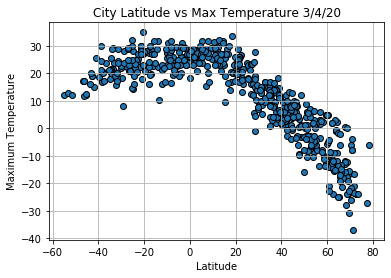

In [14]:
#there appears to be a rough relationship of temperature going higher the closer to the equator "0" and lower further away
#from the equator

#### Latitude vs. Humidity Plot

In [ ]:
#scatter plot showing the effects of latitude on humidity 3/4/20
plt.scatter(city_df['Latitude'], city_df["Humidity"], edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 3/4/20")
plt.grid()
plt.show()

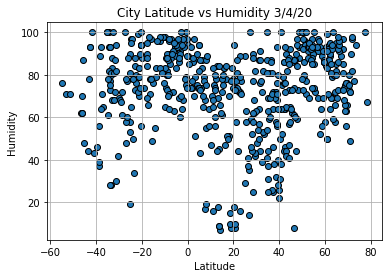

In [15]:
#there does not appear to be much relationship between humidity and latitude

#### Latitude vs. Cloudiness Plot

In [ ]:
#scatter plot showing the effects of latitude on cloudiness 3/4/20
plt.scatter(city_df['Latitude'], city_df["Cloudiness"], edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 3/4/20")
plt.grid()
plt.show()

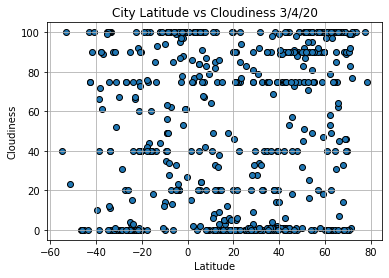

In [16]:
#there does not appear to be much relationship between cloudiness and latitude

#### Latitude vs. Wind Speed Plot

In [ ]:
#scatter plot showing the effects of latitude on wind speed 3/4/20
plt.scatter(city_df['Latitude'], city_df["Wind Speed"], edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 3/4/20")
plt.grid()
plt.show()

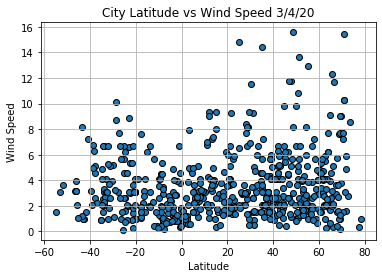

In [27]:
#there does not appear to be much relationship between wind speed and latitude

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
#city_df.head()

In [19]:
# Create Northern and Southern Hemisphere DataFrames

northern = city_df.loc[city_df["Latitude"] >= 0, :]
southern = city_df.loc[city_df["Latitude"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is -0.9157694063410432


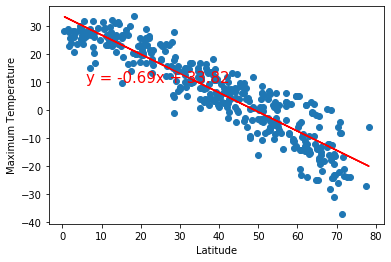

In [36]:
x_values = northern["Latitude"]
y_values = northern["Maximum Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
print(f"The r-squared value is {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.47620719340488643


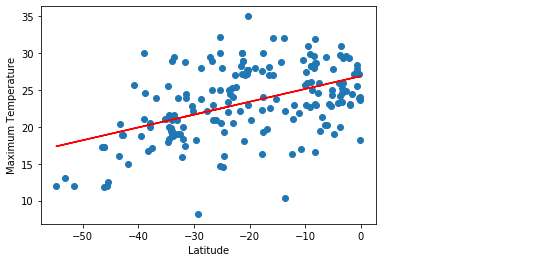

In [37]:
x_values = southern["Latitude"]
y_values = southern["Maximum Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
print(f"The r-squared value is {rvalue}")
plt.show()

In [38]:
#there appears to be a stronger relationship between northern latitude to the equator and souther latitude and the equator
#this could be related to how many cities are closer to the equator in the north and how many are closer to the equator in the south

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.3018563253438649


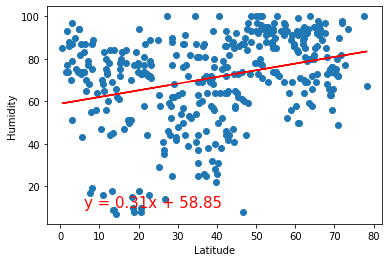

In [30]:
x_values = northern["Latitude"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.33350138899118764


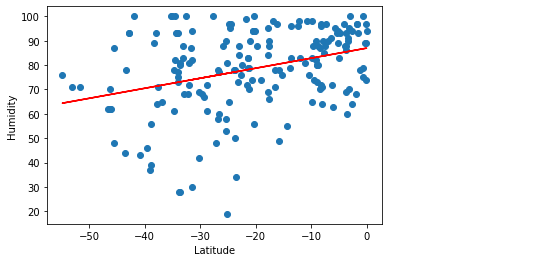

In [39]:
x_values = southern["Latitude"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue}")
plt.show()

In [ ]:
#there appears to be a lack of relationship between humidity and latitude and that is consistent in the northern and 
#southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.44380273733915543


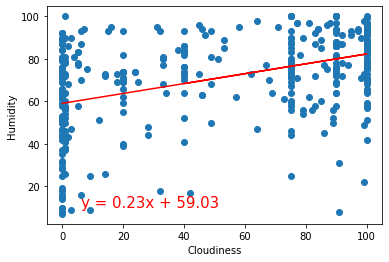

In [32]:
x_values = northern["Cloudiness"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Cloudiness")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.3275008715210543


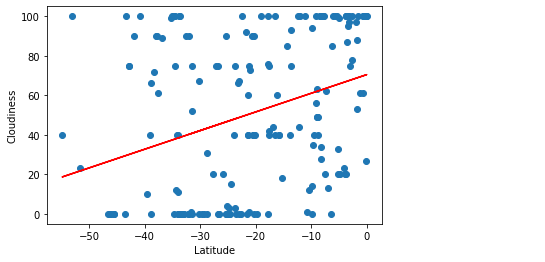

In [40]:
x_values = southern["Latitude"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue}")
plt.show()

In [ ]:
#there appears to be a lack of relationship between cloudiness and latitude and that is relatively consistent in the 
#northern and southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.019999745859688563


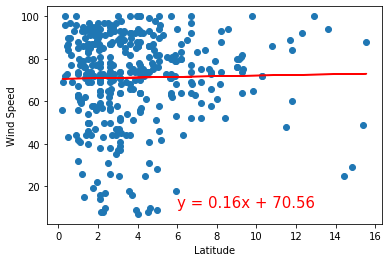

In [34]:
x_values = northern["Wind Speed"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is -0.2690024162833842


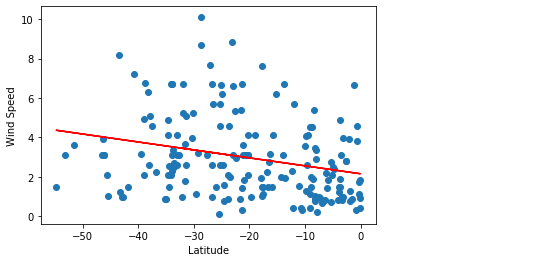

In [41]:
x_values = southern["Latitude"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue}")
plt.show()

In [ ]:
#there appears to be a lack of relationship between wind speed and latitude and that is relatively consistent in the 
#northern and southern hemisphere

In [46]:
city_df.to_csv("../city_data.csv")